In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Load your cleaned dataset
df = pd.read_csv('keywords_data.csv')

# Configure visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)



In [2]:
# List of cleaned rank columns for each domain
rank_cols = [
    'yatchingpages.com_cleaned_rank', 
    'superyachttimes.com_rank_cleaned',
    'superyachtcontent.com_cleaned_rank', 
    'superyachtserviceguide.com_cleaned_rank',
    'boatinternation.com_cleaned_rank'
]

print("--- Spearman Correlation: Rank vs. Keyword Difficulty ---")
for col in rank_cols:
    # We drop rows where KD is null to ensure a valid calculation
    temp_df = df[[col, 'Keyword Difficulty']].dropna()
    
    coef, p_value = spearmanr(temp_df[col], temp_df['Keyword Difficulty'])
    
    print(f"Domain: {col.split('_')[0]}")
    print(f"  Correlation Coefficient: {coef:.3f}")
    print(f"  P-Value: {p_value:.4f}")
    print("-" * 30)

--- Spearman Correlation: Rank vs. Keyword Difficulty ---
Domain: yatchingpages.com
  Correlation Coefficient: 0.285
  P-Value: 0.0000
------------------------------
Domain: superyachttimes.com
  Correlation Coefficient: -0.059
  P-Value: 0.0000
------------------------------
Domain: superyachtcontent.com
  Correlation Coefficient: -0.037
  P-Value: 0.0011
------------------------------
Domain: superyachtserviceguide.com
  Correlation Coefficient: 0.036
  P-Value: 0.0015
------------------------------
Domain: boatinternation.com
  Correlation Coefficient: -0.106
  P-Value: 0.0000
------------------------------


In [3]:
# Drop rows where CPC or Search Volume are null
market_data = df[['Search Volume', 'CPC']].dropna()

coef, p_value = spearmanr(market_data['Search Volume'], market_data['CPC'])

print(f"--- Spearman Correlation: Search Volume vs. CPC ---")
print(f"Correlation Coefficient: {coef:.3f}")
print(f"P-Value: {p_value:.4f}")

--- Spearman Correlation: Search Volume vs. CPC ---
Correlation Coefficient: 0.017
P-Value: 0.4897


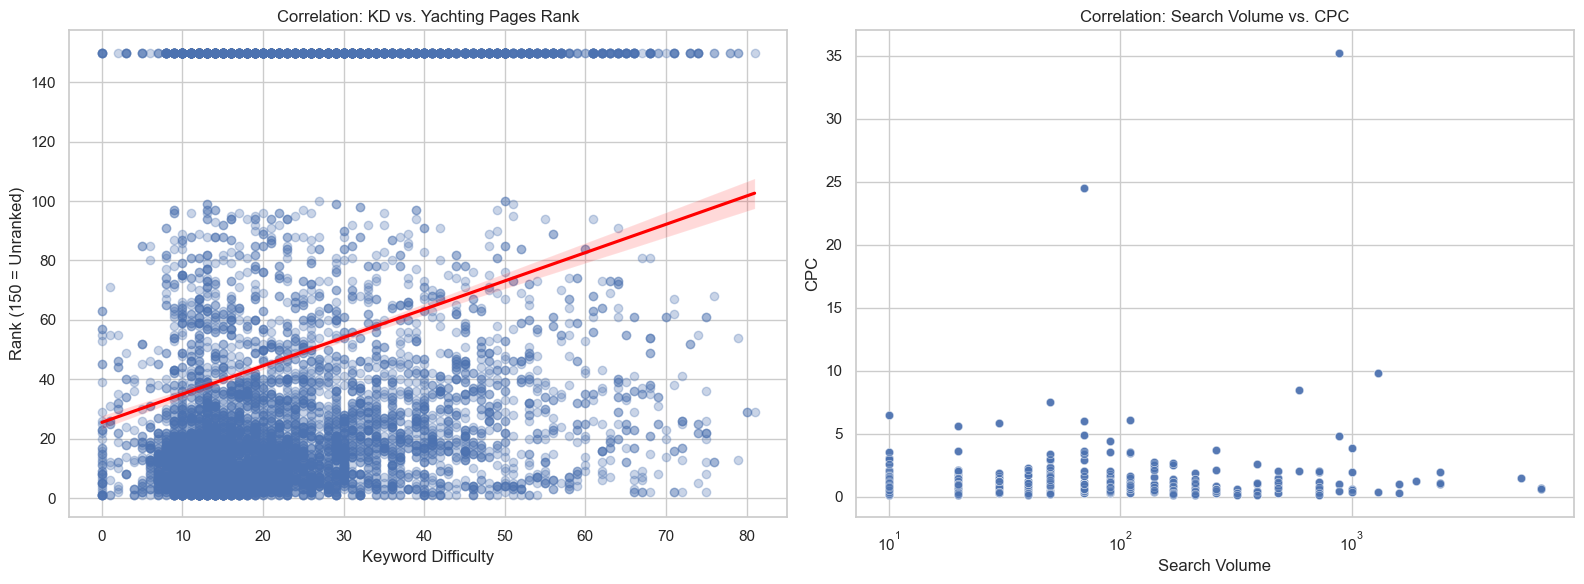

In [4]:
# Create a 1x2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Keyword Difficulty vs Rank (Example for one domain)
sns.regplot(data=df, x='Keyword Difficulty', y='yatchingpages.com_cleaned_rank', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=ax1)
ax1.set_title('Correlation: KD vs. Yachting Pages Rank')
ax1.set_ylabel('Rank (150 = Unranked)')

# Plot 2: Search Volume vs CPC
sns.scatterplot(data=df, x='Search Volume', y='CPC', alpha=0.5, ax=ax2)
ax2.set_title('Correlation: Search Volume vs. CPC')
ax2.set_xscale('log') # Log scale is often better for Search Volume distribution

plt.tight_layout()
plt.show()

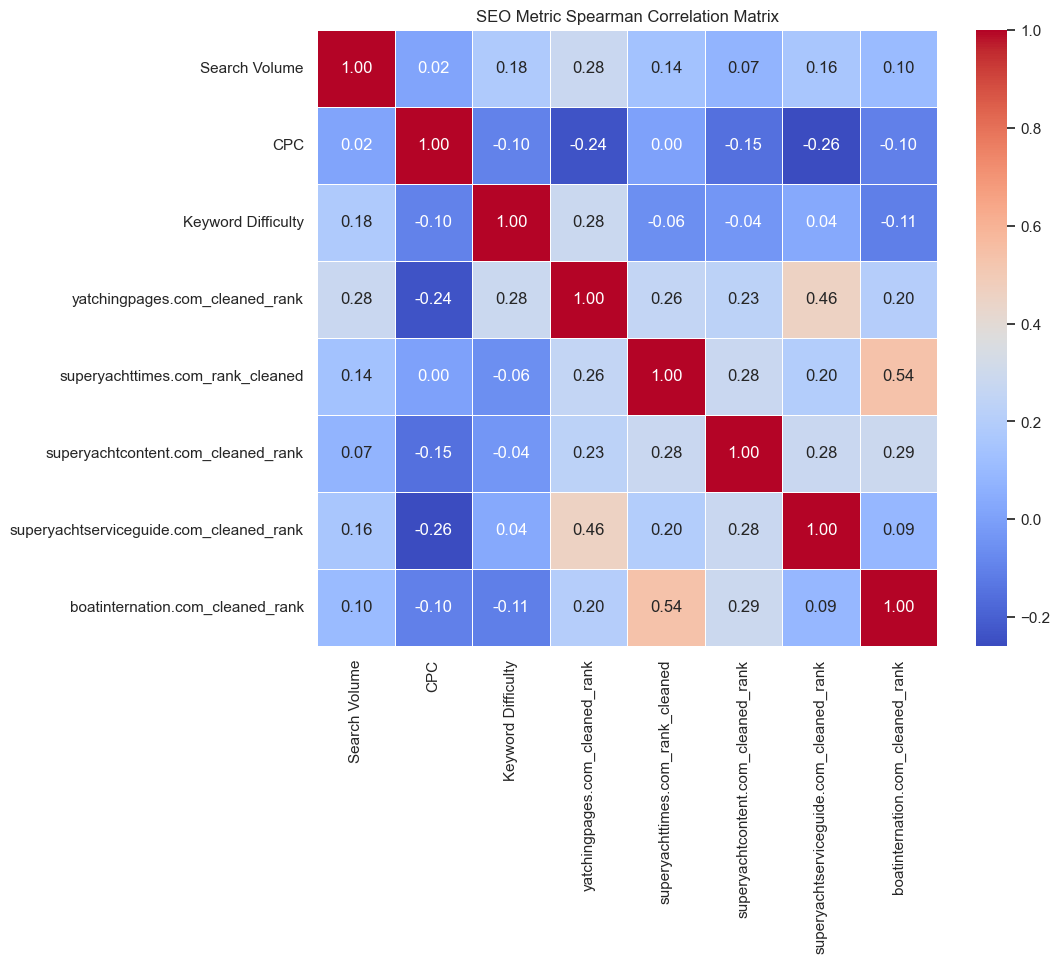

In [5]:
# Select key metrics for the heatmap
heatmap_cols = ['Search Volume', 'CPC', 'Keyword Difficulty'] + rank_cols
corr_matrix = df[heatmap_cols].corr(method='spearman')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('SEO Metric Spearman Correlation Matrix')
plt.show()